In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df =  pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

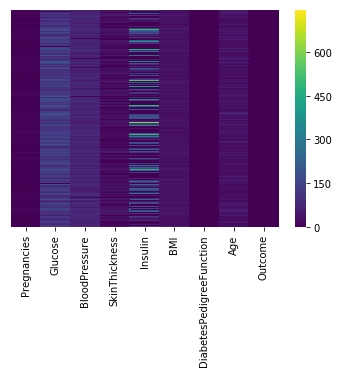

In [16]:
sns.heatmap(df,cbar=True,yticklabels=False,cmap='viridis')

In [17]:
columns_with_zero=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

In [18]:
for column in columns_with_zero:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,153.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.0,29.0,153.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [20]:
x=df.drop('Outcome',axis=1)

In [21]:
y=df['Outcome']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [23]:
st_scaler=StandardScaler()
x_train=st_scaler.fit_transform(x_train)
x_test=st_scaler.transform(x_test)

In [24]:
model=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [25]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [26]:
prediction=model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [30]:
print(confusion_matrix(y_test,prediction))

[[349  46]
 [ 65 140]]


In [31]:
print(f1_score(y_test,prediction))

0.7161125319693095


In [32]:
print(accuracy_score(y_test,prediction))

0.815


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
mod=LogisticRegression()

In [35]:
mod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
pred=mod.predict(x_test)

In [37]:
print(accuracy_score(y_test,pred))

0.7616666666666667
